# Moverscore

Moverscore is a metric to evaluate semantic similarity between sentences. It was proposed in (Zhao et al. 2019, https://arxiv.org/pdf/1909.02622.pdf)and is closely related to BERTScore (https://arxiv.org/pdf/1904.09675.pdf). The implemenation can be found in https://github.com/AIPHES/emnlp19-moverscore/. 

**PLEASE INSTALL MOVERSCORE AS BELOW USING**
- https://drive.google.com/drive/folders/1SMHlJ338BHoJnkRiY-419EjLdFTHV91O?usp=sharing

Alternatively, please refer to https://github.com/AIPHES/emnlp19-moverscore

## Mount Drive and install packages

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
base_path_moversocre = '/content/gdrive/MyDrive/NLP_EvaluationMetrics/MoverScore/'

In [ ]:
! pip3 install -r /content/gdrive/MyDrive/NLP_EvaluationMetrics/MoverScore/requirements.txt 

     |████████████████████████████████| 184kB 7.4MB/s 
     |████████████████████████████████| 133kB 27.9MB/s 
     |████████████████████████████████| 901kB 35.2MB/s 
     |████████████████████████████████| 1.2MB 37.3MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 7.6MB 34.2MB/s 
ERROR: botocore 1.20.97 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
! pip3 install transformers

     |████████████████████████████████| 2.5MB 8.3MB/s 
     |████████████████████████████████| 3.3MB 34.9MB/s 


In [ ]:
! pip3 install pytorch-pretrained-bert

     |████████████████████████████████| 133kB 7.5MB/s 


In [ ]:
! pip3 install moverscore

     |████████████████████████████████| 81kB 4.8MB/s 
  Created wheel for moverscore: filename=moverscore-1.0.3-cp37-none-any.whl size=7968 sha256=3a091d9545553e0deb2b50b4e0dd86f93a2a723cdc543c63167dd2f5abe55c93
  Stored in directory: /root/.cache/pip/wheels/79/1b/3b/146bc744eef28d6c091b864fac8b76a7ffec5a694776c105f1
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26323 sha256=512d3003a77fe31246367aba219dc9bfa1782c7f24d6f53439c3856eaebc14be
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built moverscore typing


In [ ]:
! pip3 install tdqm

  Created wheel for tdqm: filename=tdqm-0.0.1-cp37-none-any.whl size=1320 sha256=65a01e4ff80213f0e6de43c20eadadc73473dab761c387bc63393d3fb1d2e6fe
  Stored in directory: /root/.cache/pip/wheels/d5/c0/4b/a98405d8b13071ab9a2be7beeef6820d26349ee46651c16a0d
Successfully built tdqm


In [ ]:
# Get Device 
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Used device is {device}')

Used device is cuda:0


moversocre works without problem. Moverscore_V2 still does not work, as DistillBERT seems to make problems


In [ ]:
# Use the original version with BERTMNLI to reproduce the results.
from moverscore import get_idf_dict, word_mover_score
# Recommend to use this version (DistilBERT) for evaluation, if the speed is your concern.
#from moverscore_v2 import get_idf_dict, word_mover_score 
from collections import defaultdict
import os
import pickle
import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


[--------------------------------------------------]


## Example and Explanation: Moverscore

Moverscore takes two sentences, tokenizes both, and runs them through BERT, such that each sentence is a set of contextualized token embeddings. Then, a (soft) alignement between the vectors representing the first sentence and vectors representing the second sentence is found (see image below). The sum of distances between aligned vectors is considered, call this d. This can be seen as the sum of the length of all blue arrows in the figure below.
Returns 1-d: 1 will be returned if both sentences are equal.

The next cell can be used to play around with moverscore. Note that applying Moverscore to a large corpus, words will also be weighted using inverse document frequency.

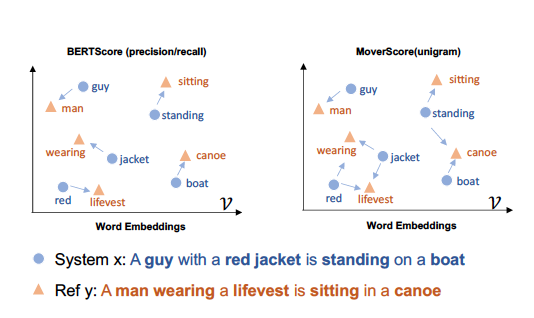

In [ ]:
translations = ['The day was sunny in Valencia']

references = ['Today the weather in Valencia was very sunny']

#idf_dict_hyp = get_idf_dict(translations) # idf_dict_hyp = defaultdict(lambda: 1.)
idf_dict_hyp = defaultdict(lambda: 1.)
#idf_dict_ref = get_idf_dict(references) # idf_dict_ref = defaultdict(lambda: 1.)
idf_dict_ref = defaultdict(lambda: 1.)

scores = word_mover_score(references, translations, idf_dict_ref, idf_dict_hyp, \
                          stop_words=[], n_gram=1, remove_subwords=True)
print(scores)

[0.6184953104753815]


## Read Paws


In [ ]:
base_path_data= '/evaluation/datasets/moverscore_data/'

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import pickle
import os

ds = tfds.load('paws_x_wiki/en', split='train')
assert isinstance(ds, tf.data.Dataset)
print(ds)

Shuffling and writing examples to /root/tensorflow_datasets/paws_x_wiki/en/1.0.0.incompleteBTQS56/paws_x_wiki-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/paws_x_wiki/en/1.0.0.incompleteBTQS56/paws_x_wiki-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/paws_x_wiki/en/1.0.0.incompleteBTQS56/paws_x_wiki-validation.tfrecord


Dataset paws_x_wiki downloaded and prepared to /root/tensorflow_datasets/paws_x_wiki/en/1.0.0. Subsequent calls will reuse this data.
<PrefetchDataset shapes: {label: (), sentence1: (), sentence2: ()}, types: {label: tf.int64, sentence1: tf.string, sentence2: tf.string}>


In [ ]:
df = tfds.as_dataframe(ds)

all_sent1 = df['sentence1'].str.decode(encoding = 'UTF-8').tolist()
all_sent2 = df['sentence2'].str.decode(encoding = 'UTF-8').tolist()
all_labels = df['label'].tolist()

Min: 5 | Max: 1251


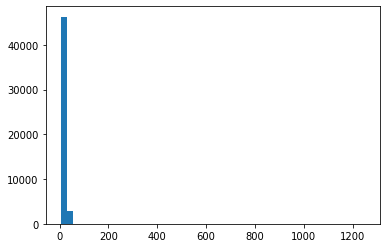

Min: 5 | Max: 118


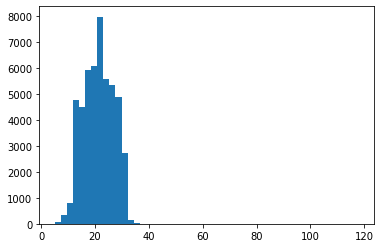

In [ ]:
len_all_sent1 = [len(sent.split()) for sent in all_sent1]
len_all_sent2 = [len(sent.split()) for sent in all_sent2]

print(f'Min: {min(len_all_sent1)} | Max: {max(len_all_sent1)}')
plt.hist(len_all_sent1, bins = 50)
plt.show()
print(f'Min: {min(len_all_sent2)} | Max: {max(len_all_sent2)}')
plt.hist(len_all_sent2, bins = 50)
plt.show()

Min: 5 | Max: 37


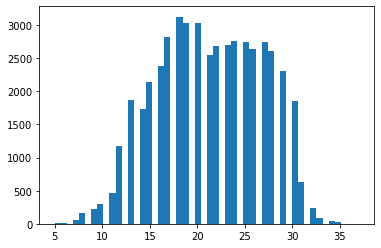

Min: 5 | Max: 36


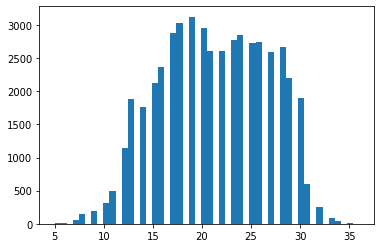

In [ ]:
# Some Filtering:
max_length = [max(l1, l2) for l1, l2 in zip(len_all_sent1, len_all_sent2)]

all_sent1 = [sent for i, sent in enumerate(all_sent1) if max_length[i] <= 40]
all_sent2 = [sent for i, sent in enumerate(all_sent2) if max_length[i] <= 40]
all_labels = [label for i, label in enumerate(all_labels) if max_length[i] <= 40]

assert len(all_sent1) ==  len(all_sent2)
assert len(all_sent2) == len(all_labels)


len_all_sent1 = [len(sent.split()) for sent in all_sent1]
len_all_sent2 = [len(sent.split()) for sent in all_sent2]

print(f'Min: {min(len_all_sent1)} | Max: {max(len_all_sent1)}')
plt.hist(len_all_sent1, bins = 50)
plt.show()
print(f'Min: {min(len_all_sent2)} | Max: {max(len_all_sent2)}')
plt.hist(len_all_sent2, bins = 50)
plt.show()

In [ ]:
# Printing Sentence pairs as examples
for i, (ref, tran) in enumerate(zip(all_sent1, all_sent2)):
  if i >2: break
  print(ref)
  print(tran, '\n', all_labels[i],'\n')

print(isinstance(tran, str))

Hugo Käch died on December 31 , 2003 in Schaffhausen near Flurlingen , Germany .
Hugo Käch died on 31 December 2003 in Flurlingen near Schaffhausen . 
 0 

In 2013 Peter married Anna Barattin while Julia is married to Nicholas Furiuele , both are members of the band Shantih Shantih .
Peter Anna Barattin married in 2013 while Julia was married to Nicholas Furiuele , both of whom are members of the band Shantih Shantih . 
 1 

The recent Sierra Leone Civil War was secular in nature featuring members of Tribal , Muslim , and Christian faiths fighting on both sides of the conflict .
The recent civil war in Sierra Leone was secular in nature , with members of Christian , Muslim , and tribal faith fighting on both sides of the conflict . 
 1 

True


### MoverScore on Paws

In [ ]:
filename = 'mover_scores_paws.pickle'
try:
  # Try to read already calculated data
  with open(base_path_data + filename, "rb") as f: 
    mover_scores_paws = pickle.load(f)
    print(f'MoverScores loaded!')

except FileNotFoundError:

  print(f'MoverScores do not exist yet! \n Calculating Moverscores...')
  # Get idf dicts 
  idf_dict_hyp = get_idf_dict(all_sent1) # idf_dict_hyp = defaultdict(lambda: 1.)
  idf_dict_ref = get_idf_dict(all_sent2) # idf_dict_ref = defaultdict(lambda: 1.)

  # calculate moverscores
  #THIS SHOULD BE IMPROVED WITH BETTER BATCHING
  mover_scores_paws = []
  for i, (ref, tran) in tqdm.notebook.tqdm(enumerate(zip(all_sent1, all_sent2)), total = len(all_sent1)):
    score = word_mover_score([ref], [tran], idf_dict_ref, idf_dict_hyp, 
                            stop_words=[], n_gram=1, remove_subwords=True)
    mover_scores_paws.append(score[0])

  # write data
  with open(base_path_data + filename, 'wb') as f:
    pickle.dump(mover_scores_paws , f)

finally:
  print('Done!')

MoverScores loaded!
Done!


In [ ]:
#print(ref)
#print(tran)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


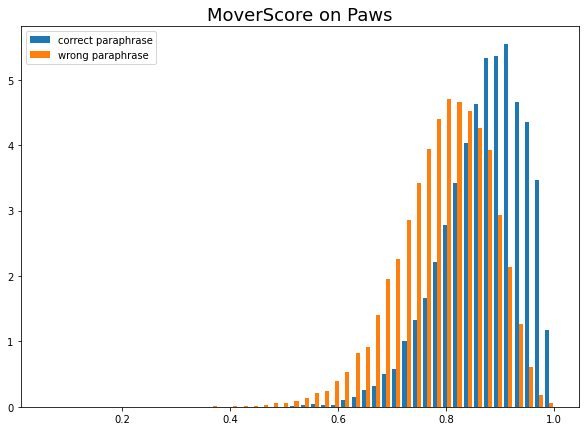

D'Agostino-Test: The null hypothesis of normality can be rejected


In [ ]:
# Statistical analysis
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

fig,ax = plt.subplots(1,1, figsize = (10,7))

mover_scores_paws_correct = [score for i,score in enumerate(mover_scores_paws) if all_labels[i] == 1]
mover_scores_paws_false = [score for i,score in enumerate(mover_scores_paws) if all_labels[i] == 0]
#sns.distplot(mover_scores_paws,  hist = True, color="blue", ax = ax[0])
ax.hist([mover_scores_paws_correct,mover_scores_paws_false] , bins = 50, label = ['correct paraphrase', 'wrong paraphrase'], density=True)
ax.set_title('MoverScore on Paws', fontsize = 18)
ax.legend()

#sns.distplot(np.random.normal(np.mean(mover_scores), np.std(mover_scores), size=len(mover_scores)),  hist = True, color="red", ax = ax[1])
#ax[1].set_title('Normal data', fontsize = 24)

#qqplot(np.array(sorted(mover_scores_paws)), line='s', ax = ax[1])
#ax[1].set_title('QQ-Plot to normal distribution', fontsize = )


plt.show()

#normal_test = stats.shapiro(mover_scores)
normal_test = stats.normaltest(np.array(mover_scores_paws))
#print(normal_test)
alpha = 0.05

if normal_test.pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("D'Agostino-Test: The null hypothesis of normality can be rejected")
else:
    print("D'Agostino-Test: The null hypothesis of normality cannot be rejected")

In [ ]:
with open(base_path_data+ 'mover_scores_paranmt75k.pickle', "rb") as f: 
    mover_scores_paranmt75k = pickle.load(f)
#mover_scores_paranmt75k 
with open(base_path_data + 'mover_scores_paranmt_sampled.pickle', "rb") as f: 
    mover_scores_paranmt_sampled = pickle.load(f)
#mover_scores_paranmt75k 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


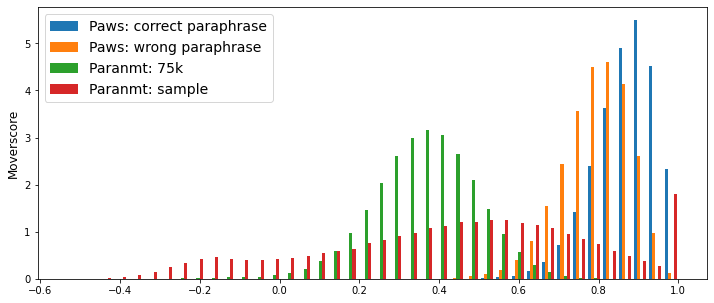

In [ ]:
# Statistical analysis
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

fig,ax = plt.subplots(1,1, figsize = (12,5))

mover_scores_paws_correct = [score for i,score in enumerate(mover_scores_paws) if all_labels[i] == 1]
mover_scores_paws_false = [score for i,score in enumerate(mover_scores_paws) if all_labels[i] == 0]
#sns.distplot(mover_scores_paws,  hist = True, color="blue", ax = ax[0])
ax.hist([mover_scores_paws_correct,mover_scores_paws_false, mover_scores_paranmt75k, mover_scores_paranmt_sampled] , bins = 40, label = ['Paws: correct paraphrase', 'Paws: wrong paraphrase', 'Paranmt: 75k', 'Paranmt: sample'], density=True)
ax.set_title('', fontsize = 18)
ax.set_ylabel('Moverscore', fontsize = 12)
ax.legend(fontsize = 14)#fontsize = 18

#sns.distplot(np.random.normal(np.mean(mover_scores), np.std(mover_scores), size=len(mover_scores)),  hist = True, color="red", ax = ax[1])
#ax[1].set_title('Normal data', fontsize = 24)

#qqplot(np.array(sorted(mover_scores_paws)), line='s', ax = ax[1])
#ax[1].set_title('QQ-Plot to normal distribution', fontsize = )


plt.show()
